# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [100]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
# TODO: Set up a connection the "Market.db" database

db_path = "/Users/kanitoure/adhoc-sql 3/db/Market.db"

conn = sqlite3.connect(db_path)

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [102]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
   SELECT COUNT(*) FROM Products
   WHERE price < 10;
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [103]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT country, COUNT(*) AS supplier_count
FROM Suppliers
GROUP BY country
ORDER BY supplier_count DESC
;""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


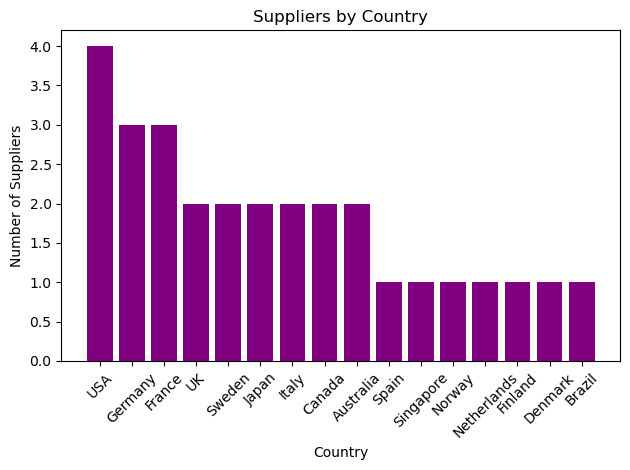

In [104]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['country', 'supplier_count'])

# TODO: Generate a visualization on this dataframe
plt.bar(df['country'], df['supplier_count'], color='purple')
plt.xlabel('Country')
plt.ylabel('Number of Suppliers')
plt.title('Suppliers by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [110]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT country, COUNT(*) AS customer_count
FROM Customers
GROUP BY country
ORDER BY customer_count DESC;
""")
# TODO: Fetch your list of tuples and print it out
cust_rows = cursor.fetchall()
print(cust_rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


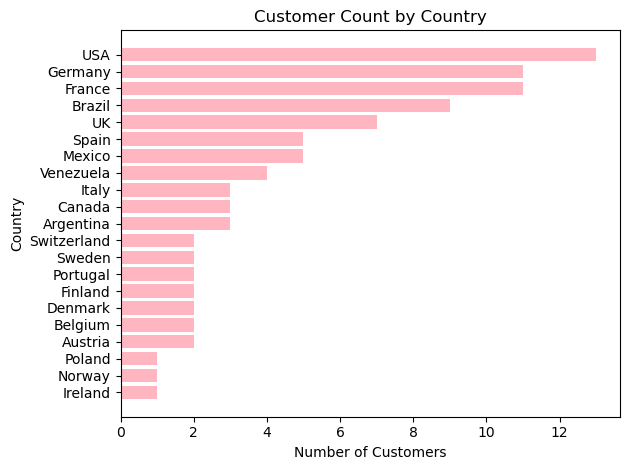

In [114]:
# TODO: Convert your list of tuples to a dataframe
cust_df = pd.DataFrame(cust_rows, columns=['country', 'customer_count'])

# TODO: Generate a visualization on this dataframe
plt.barh(cust_df['country'], cust_df['customer_count'], color='lightpink')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.title('Customer Count by Country')
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()


### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
SELECT p.productname, SUM(od.quantity) AS total_quantity
FROM Products as p
JOIN  OrderDetails as od ON p.productid = od.productid
GROUP BY p.productname
ORDER BY total_quantity ASC
LIMIT 20;
""")
# TODO: Fetch your list of tuples and print it out
lp_by_quat_rows = cursor.fetchall()
print(lp_by_quat_rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


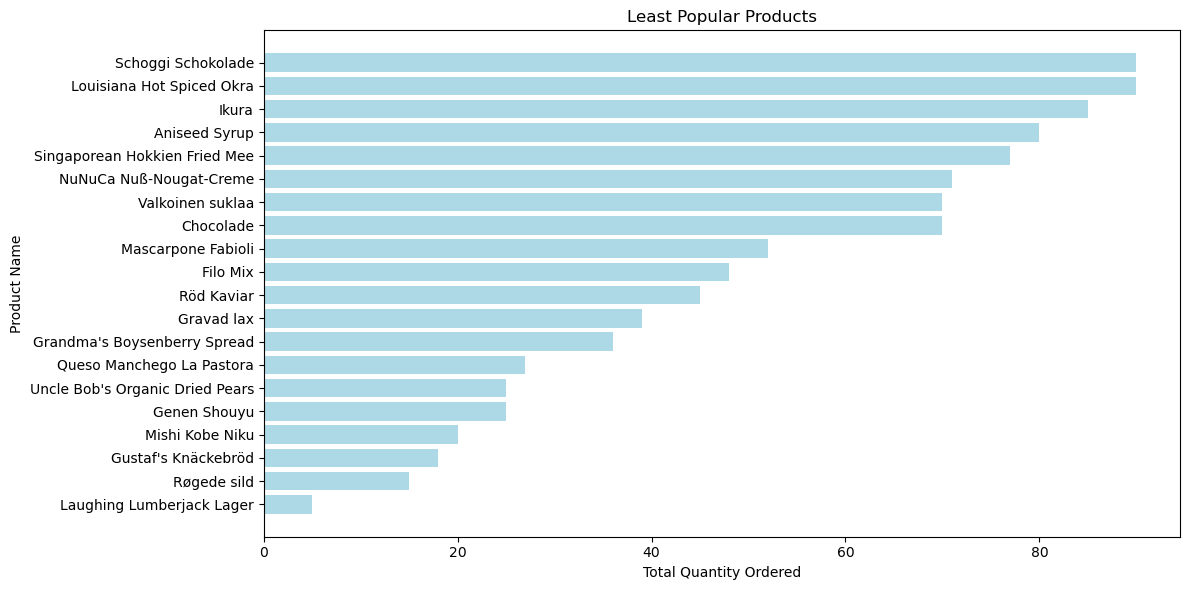

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['productname', 'total_quantity'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 6))
plt.barh(df['productname'], df['total_quantity'], color='lightblue')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Least Popular Products')
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [107]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT p.productname, SUM(od.quantity * p.price) AS total_revenue
FROM Products as p
JOIN OrderDetails as od ON p.productid = od.productid
GROUP BY p.productname
ORDER BY total_revenue ASC
LIMIT 10;
""")

# TODO: Fetch your list of tuples and print it out
lp_rows = cursor.fetchall()
print(lp_rows)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0)]


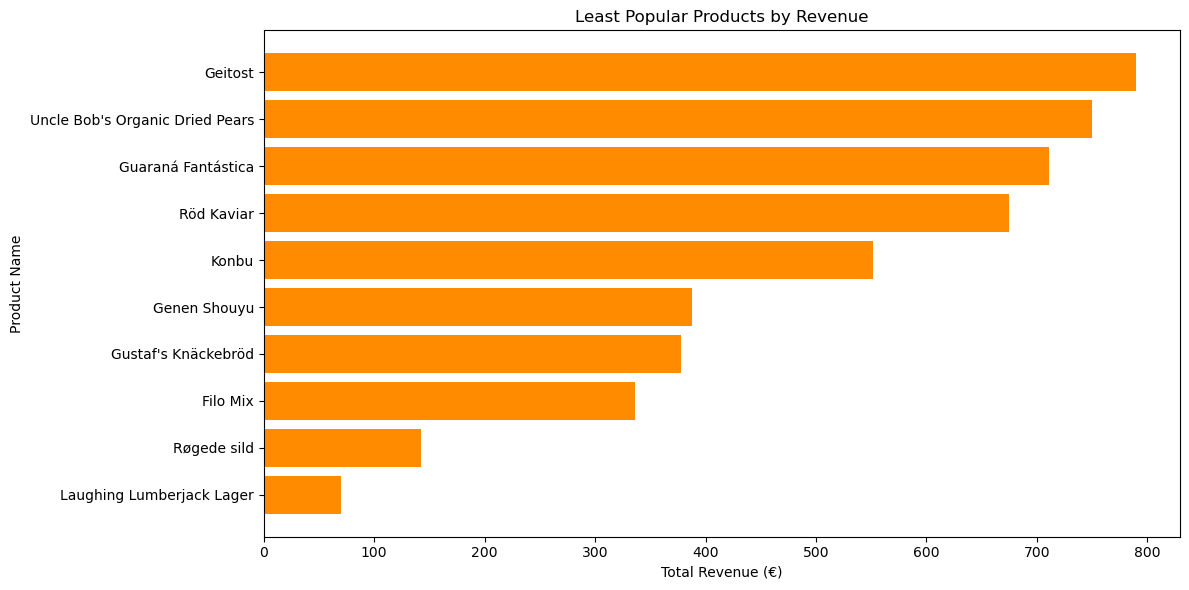

In [ ]:
# TODO: Convert your list of tuples to a dataframe
lp_df = pd.DataFrame(rows, columns=['product_name', 'total_revenue'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 6))
plt.barh(df['product_name'], df['total_revenue'], color='darkorange')
plt.xlabel('Total Revenue (€)')
plt.ylabel('Product Name')
plt.title('Least Popular Products by Revenue')
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT c.country, COUNT(o.orderid) AS total_orders
FROM Customers as c
JOIN Orders as o ON c.customerid = o.customerid
GROUP BY c.country
ORDER BY total_orders DESC;
""")
# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


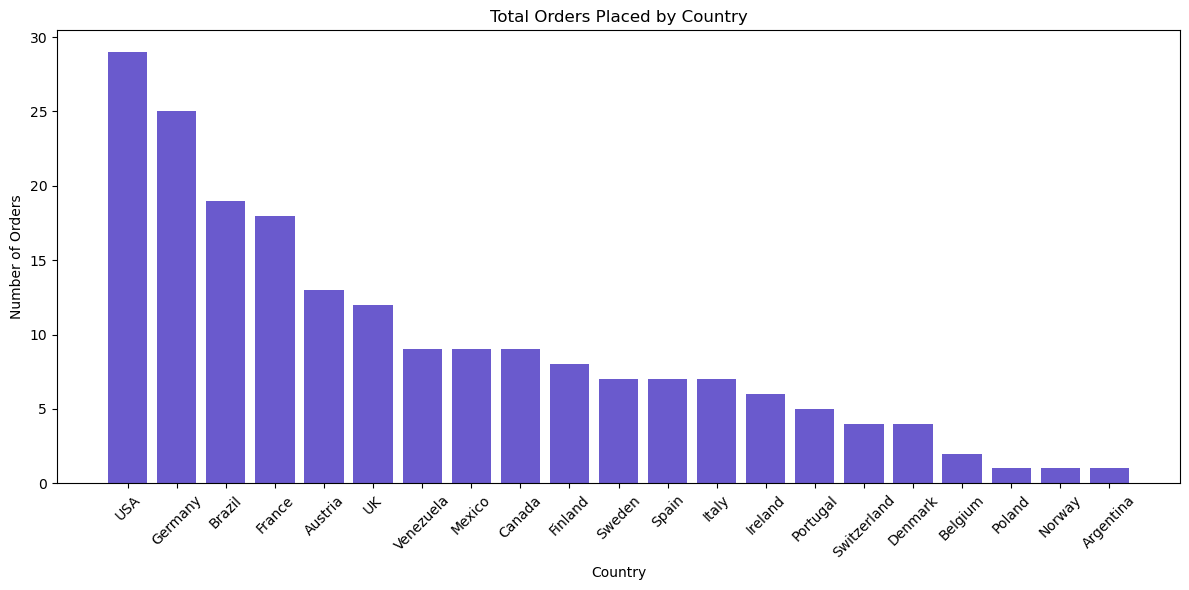

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['country', 'total_orders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 6))
plt.bar(df['country'], df['total_orders'], color='slateblue')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Total Orders Placed by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT c.country, COUNT(c.customerid) AS no_order_cust
FROM Customers as c
LEFT JOIN Orders as o ON c.customerid = o.customerid
WHERE o.orderid IS NULL
GROUP BY c.country
ORDER BY no_order_cust DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


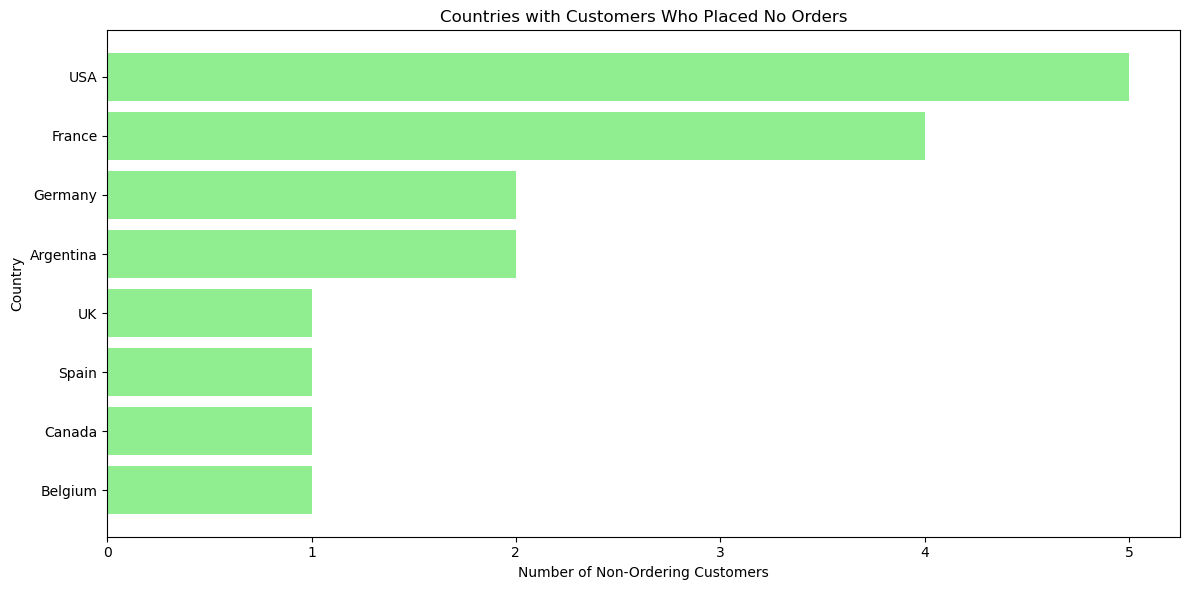

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['country', 'no_order_cust'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 6))
plt.barh(df['country'], df['no_order_cust'], color='lightgreen')
plt.xlabel('Number of Non-Ordering Customers')
plt.ylabel('Country')
plt.title('Countries with Customers Who Placed No Orders')
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
SELECT s.suppliername, COUNT(od.orderid) AS order_count
FROM Suppliers as s
JOIN Products as p ON s.supplierid = p.supplierid
JOIN OrderDetails as od ON p.productid = od.productid
GROUP BY s.suppliername
ORDER BY order_count DESC
LIMIT 8;
""")

# TODO: Fetch your list of tuples and print it out
supp_rows = cursor.fetchall()
print(supp_rows)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20)]


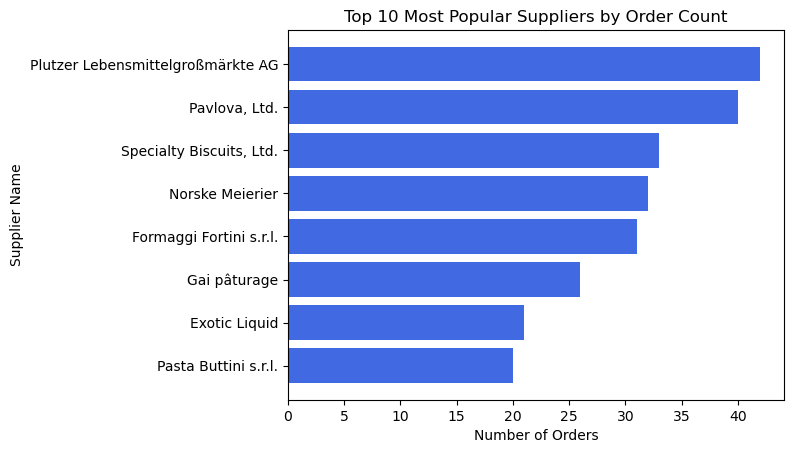

In [ ]:
# TODO: Convert your list of tuples to a dataframe
supp_df = pd.DataFrame(rows, columns=['supplier_name', 'order_count'])

# TODO: Generate a visualization on this dataframe
plt.barh(df['supplier_name'], df['order_count'], color='royalblue')
plt.xlabel('Number of Orders')
plt.ylabel('Supplier Name')
plt.title('Top 10 Most Popular Suppliers by Order Count')
plt.gca().invert_yaxis()
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

In [ ]:
cust_df = pd.DataFrame(cust_rows, columns=['country', 'cust_count'])
supp_df = pd.DataFrame(rows, columns=['country', 'supplier_count'])

merge_df = pd.merge(cust_df, supp_df, on='country', how='inner')

print(merge_df)



    country  cust_count  supplier_count
0       USA          13               4
1   Germany          11               3
2    France          11               3
3    Brazil           9               1
4        UK           7               2
5     Spain           5               1
6     Italy           3               2
7    Canada           3               2
8    Sweden           2               2
9   Finland           2               1
10  Denmark           2               1
11   Norway           1               1


### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The United States (13 customers), France (11 customers), and Germany (11 customers) are the three nations with the largest customer bases.  These countries also have more suppliers: the U.S. has four, France has three, and Germany has three.  This demonstrates that when a country has more clients, there are also more suppliers.

In [108]:
df_quantity = pd.DataFrame(lp_by_quat_rows, columns=['productname', 'total_quantity'])
df_revenue = pd.DataFrame(lp_rows, columns=['productname', 'total_revenue'])

merged_df = pd.merge(df_quantity, df_revenue, on='productname')

print(merged_df)

                       productname  total_quantity  total_revenue
0        Laughing Lumberjack Lager               5           70.0
1                      Røgede sild              15          142.5
2              Gustaf's Knäckebröd              18          378.0
3                     Genen Shouyu              25          387.5
4  Uncle Bob's Organic Dried Pears              25          750.0
5                       Röd Kaviar              45          675.0
6                         Filo Mix              48          336.0


### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The least popular product by order amount is Laughing Lumberjack Lager, which has only 5 units have ordered. Its total income is just as small, totaling €70. These results show a positive correlation between order quantity and revenue. Products that sell fewer units generally make less money. For example, Gustaf's Knäckebröd has  18 units ordered and 378 euros in sales, although Uncle Bob's Organic Dried Pears (25 units) has larger income (750 euros).

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

The country with the most orders is the United States, with a total of 29. It also has the highest number of customers who haven’t placed any orders, with 5. France follows with 4 non-ordering customers, and Germany has 2. These two countries also rank high in overall order volume: Germany has 25 orders and France has 18. This means that it's very likely that countries who have large customer bases will have larger number of non-ordering customers apart of total customer base.

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

Plutzer Lebensmittelgroßmärkte AG is the provider with the highest orders, totaling 42.  Compared to Specialty Biscuits, Ltd., which has 33 orders, and Pavlova, Ltd., which has 40 orders, this is slightly greater.  The data suggest that Plutzer Lebensmittelgroßmärkte AG is a major supplier, most likely offering a diverse selection of popular products that are ordered frequently.
